# Một ví dụ GD cho LR, so sánh nghiệm với dùng công thức
Ở đây ta sử dụng hàm tuyến tính $y = 4x + 7$

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Khởi tạo dữ liệu

(1000, 1) (1000, 1)


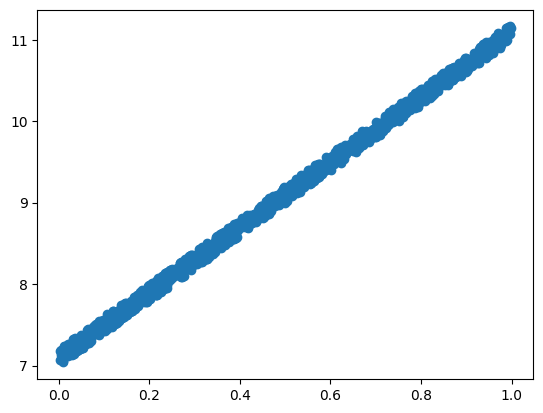

In [36]:
X = np.random.rand(1000, 1)
y = 4 * X + 7 + np.random.rand(1000, 1) * 0.2

print(X.shape, y.shape)
plt.plot(X, y, 'o')
plt.show()

### Tính toán nghiệm theo công thức nghiệm

In [37]:


#Tạo Xbar
one = np.ones((X.shape[0],1))
Xbar = np.hstack((one, X))

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

print(w)

[[7.1000475 ]
 [4.00012681]]


### Tính toán nghiệm theo GD
$L(w) = \dfrac{1}{2N}(y - \bar{X}w)^2$

In [38]:
def loss(w):
    return 0.5 * ((y - np.dot(Xbar, w)) ** 2) / 1000

def gradient(w):
    return np.dot(Xbar.T, (np.dot(Xbar, w) - y)) / 1000

def GD(w, learning_rate = 0.1, iterations = 1000):
    ws = [w]
    for i in range(iterations):
        new_w = ws[-1] - learning_rate * gradient(ws[-1])
        if np.linalg.norm(gradient(new_w)) < 1e-6:
            break
        ws.append(new_w)
    return ws, i


In [39]:
w0 = np.array([[0.0], [0.0]])

ws, iterations = GD(w0, learning_rate=0.5, iterations=1000)
print(f"Iterations: {iterations}")  
print(ws[-1])


Iterations: 283
[[7.10005436]
 [4.00011351]]


GD đặt được nghiệm sát với nghiệm được tính toán theo công thức

In [40]:
def check(w1, w2):
    return np.linalg.norm(w1 - w2) < 1e-3

check(w, ws[-1])  # True if GD converged to the same solution as the closed-form solution

True